In [3]:
import numpy as np

raw_data = np.genfromtxt('/home/mk/dev_ws/data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

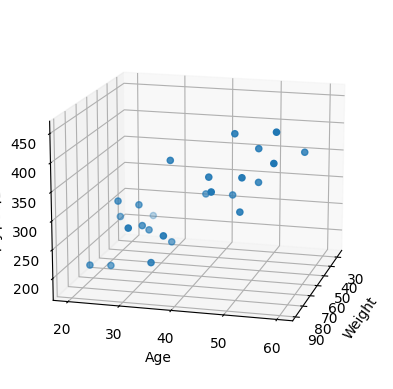

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)


plt.show()

In [6]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)

y_data = np.array(raw_data[:,4], dtype=np.float32)

ydata = y_data.reshape((25,1))

In [9]:
import tensorflow as tf


model = tf.keras.models.Sequential([
tf.keras.layers.Dense(1, input_shape=(2, )),
])

model.compile(optimizer='rmsprop', loss='mse' )

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(x_data, y_data, epochs=4000)

Epoch 1/4000
1/1 [==============================] - ETA: 0s - loss: 79698.7969

2024-05-12 16:46:02.622451: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5a93f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 16:46:02.622475: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-12 16:46:02.625075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-12 16:46:02.633705: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-12 16:46:02.728473: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 1s 581ms/step - loss: 79698.7969
Epoch 2/4000
1/1 [==============================] - 0s 4ms/step - loss: 79507.2188
Epoch 3/4000
1/1 [==============================] - 0s 4ms/step - loss: 79368.4688
Epoch 4/4000
1/1 [==============================] - 0s 4ms/step - loss: 79252.4297
Epoch 5/4000
1/1 [==============================] - 0s 4ms/step - loss: 79149.5312
Epoch 6/4000
1/1 [==============================] - 0s 4ms/step - loss: 79055.3203
Epoch 7/4000
1/1 [==============================] - 0s 3ms/step - loss: 78967.3125
Epoch 8/4000
1/1 [==============================] - 0s 3ms/step - loss: 78883.9609
Epoch 9/4000
1/1 [==============================] - 0s 3ms/step - loss: 78804.2500
Epoch 10/4000
1/1 [==============================] - 0s 3ms/step - loss: 78727.4375
Epoch 11/4000
1/1 [==============================] - 0s 3ms/step - loss: 78653.0000
Epoch 12/4000
1/1 [==============================] - 0s 4ms/step - loss: 78580.5078
Epoch 13/400

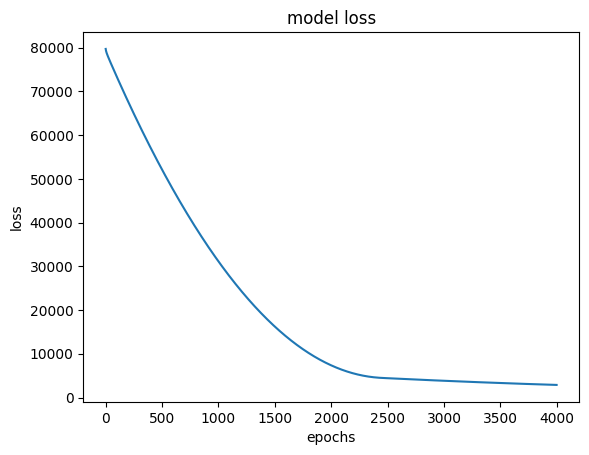

In [12]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs' )
plt.show()

In [13]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 62ms/step


array([[405.94638]], dtype=float32)

In [14]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 12ms/step


array([[240.95421]], dtype=float32)

In [15]:
W_, b_ = model.get_weights()

print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[2.6992106]
 [3.0012498]]
bias is :  [3.9703252]


In [16]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

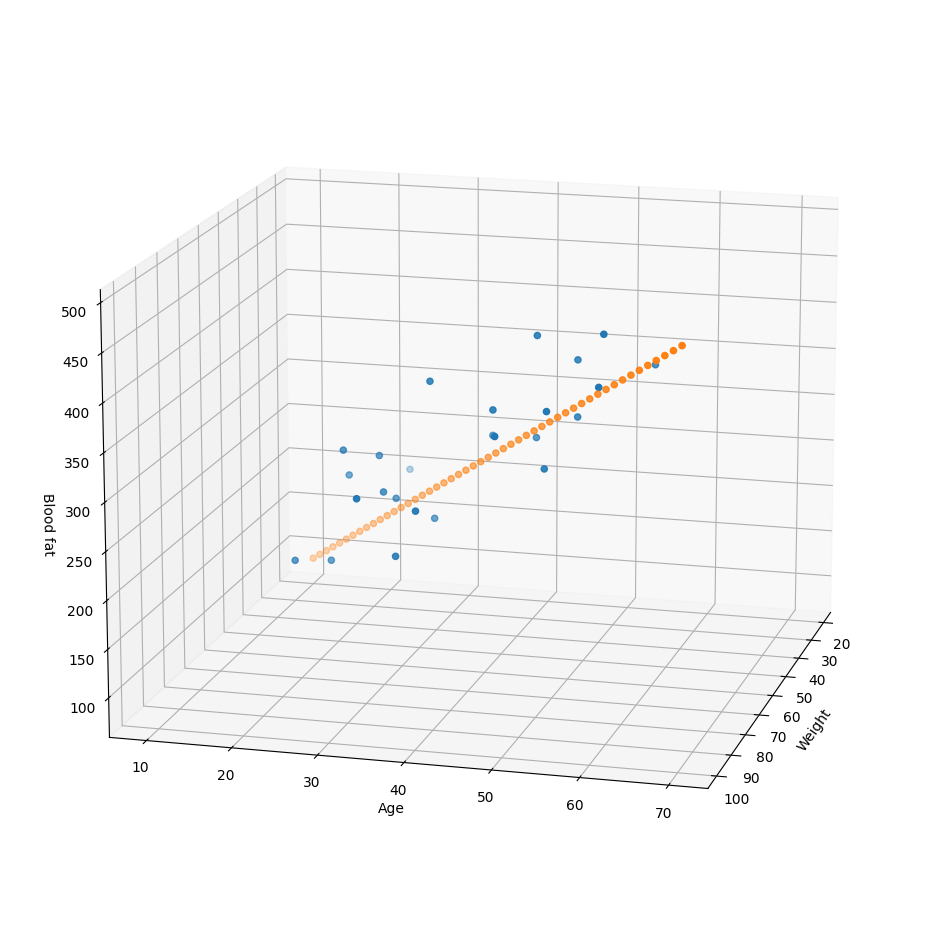

In [17]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')

ax.set_zlabel('Blood fat')

ax. view_init(15, 15)

plt.show()

In [18]:
import numpy as np

X = np.array([[0,0],
[1, 0],
[0, 1],
[1, 1] ])
y = np.array([[0], [1], [1], [0]])

In [19]:
model = tf.keras.Sequential([
tf .keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
tf.keras.layers.Dense(1, activation='sigmoid' )
])

In [20]:
model.compile(optimizer=tf .keras.optimizers.SGD(lr=0.1), loss='mse')

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit(X, y, epochs=4000, batch_size=1)

Epoch 1/4000


2024-05-12 16:59:51.747827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


4/4 [==============================] - 1s 2ms/step - loss: 0.2899
Epoch 2/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 3/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 4/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 5/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2880
Epoch 6/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2875
Epoch 7/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2871
Epoch 8/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.2866
Epoch 9/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 10/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 11/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 12/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 13/4000
4/4 [==============================] - 0s 2ms/st

In [23]:
model.predict(X)

1/1 [==============================] - 0s 31ms/step


array([[0.47459388],
       [0.5078757 ],
       [0.50155354],
       [0.5295316 ]], dtype=float32)

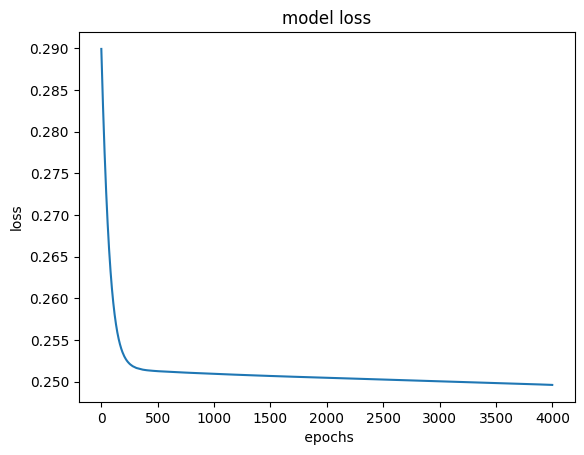

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel(' epochs' )
plt.show()

In [25]:
for w in model.weights:
  print('---')
  print(w)

---
<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.56096256,  1.0694804 ],
       [-0.45374572,  0.79492426]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-0.17410521, -0.07137619], dtype=float32)>
---
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.81742036],
       [ 0.10023049]], dtype=float32)>
---
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.22318088], dtype=float32)>


In [26]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

y= iris.target

In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
enc.categories_

[array([0, 1, 2])]

In [30]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
test_size=0.2,
random_state=13)

In [32]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax'), ])





In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary ()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.0747 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.6083
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9082 - accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8642 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7394 - accuracy: 0.6500
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.6750
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.7833
Epoch 11/100
4/4 [===========

In [35]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0818 - accuracy: 1.0000 - 83ms/epoch - 83ms/step


[0.08177465945482254, 1.0]

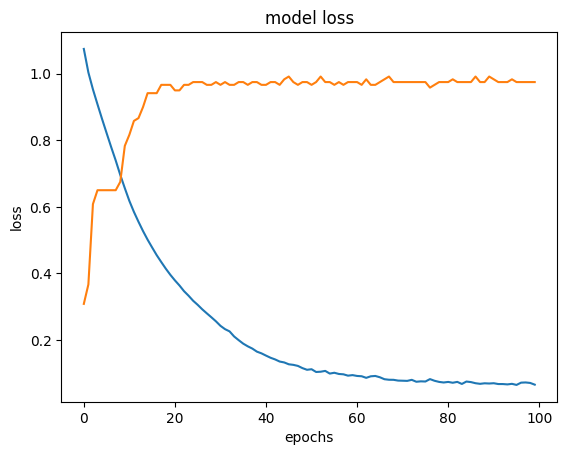

In [36]:
plt.plot(hist.history['loss'])

plt.plot(hist.history[ 'accuracy'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epochs' )
plt.show()

